# Data Hands-on

This Jupyter Notebook demonstrate a few examples of reading and preparing data for network analysis. 

Python code is provided below to help you get started but you may need to make revisions to make it work for the particular dataset you work with. 

## Read data and preparing data for NetworkX

In NetworkX, you can read network data from different formats, such as `adjascency list`, `adjascency matrix`, `edge list`, etc. 

In order to read data into NetworkX, you need to first transform your data into a proper format that is acceptable for NetworkX. This process applies to any other SNA software packages. 

See [this NetworkX reference page](https://networkx.org/documentation/stable/reference/readwrite/index.html) for details. 

## Example 1: Reading Well-formatted Network Data from CSV


In this example, we read an open dataset named [Vickers 7th Graders (1981)](https://networks.skewed.de/net/7th_graders). Check out the dataset page for more information. 

The network data can be downloaded as a ZIP file that contains nodes and edges. 

Below, we read the ZIP file directly from the website and then extract these CSV files for network construction. 

In [1]:
import requests, zipfile, io
import pandas as pd

url = 'https://networks.skewed.de/net/7th_graders/files/7th_graders.csv.zip'
edges_file = 'edges.csv'
nodes_file = 'nodes.csv'

r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

nodes = pd.read_csv(nodes_file, sep=',')
nodes = nodes.set_axis(['ID', 'name', 'position'], axis='columns') # rename the columns
nodes

,ID,name,position
0,0,NaN,"array([-1.25328431, -5.19582831])"
1,1,NaN,"array([-1.17175257, -5.39938108])"
2,2,NaN,"array([-1.04017448, -5.48106062])"
3,3,NaN,"array([-1.07294196, -5.61418605])"
4,4,NaN,"array([-1.36638259, -5.48876888])"
5,5,NaN,"array([-1.26042538, -5.47973283])"
6,6,NaN,"array([-0.94831916, -5.36563054])"
7,7,NaN,"array([-1.33077439, -5.4211611 ])"
8,8,NaN,"array([-1.33161904, -5.59167846])"
9,9,NaN,"array([-1.17888983, -5.62070043])"


In [2]:
edges = pd.read_csv(edges_file, sep=',')
edges = edges.set_axis(['source', 'target', 'weight', 'layer'], axis='columns') # rename the columns
edges

,source,target,weight,layer
0,0,5,1,1
1,0,7,1,1
2,0,10,1,1
3,0,11,1,1
4,0,13,1,1
...,...,...,...,...
735,28,12,1,3
736,28,22,1,3
737,28,23,1,3
738,28,26,1,3


In [3]:
edges_layer1 = edges[edges['layer'] == 1] 

Note in this network is *directed* and *multiplex* -- meaning there are different types of edges. 

According to the page, "Students nominated classmates for three different activities (who do you get on with in the class, who are your best friends, and who would you prefer to work with)." Each type of edges is distinguished by the `layer` column in the edge list. 

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

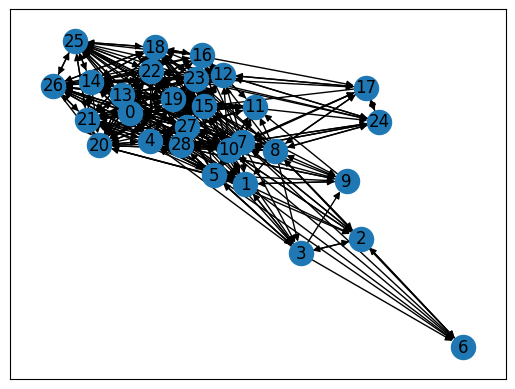

In [5]:
DG = nx.DiGraph()

# Add nodes -- let's add each node on by one and store 'position' as a node attribute
for _, row in nodes.iterrows():
    DG.add_node(row['ID'], position = row['position'])

# Add edges with attributes from the DataFrame to the graph
for _, row in edges_layer1.iterrows():
    DG.add_edge(row['source'], row['target'], weight = row['weight'], layer=row['layer'])

# Generate a quick network visualization
nx.draw_networkx(DG)

Congratulations, you have successfully imported the dataset to networkx!

## Example 2: Analyzing Learner Interactions in MOOC Discussion Forums

In this example, we've taken the data from the forums of a previous iteration of the MOOC *Big Data
and Education*, from week 1.

The data set has four columns: 

- the post ID, 
- the poster’s ID, 
- the thread the post was in, and 
- which post this post was a response to

### Let's first load the MOOC dataset and take a look

Let's read it in to a pandas dataframe and inspect its content. 

In [6]:
df = pd.read_csv("https://learninganalytics.upenn.edu/ryanbaker/EDM2014/ba5-data.txt", delimiter='\t')

df = df.rename(columns={"response-to": "toID"})

df['toID'] = df['toID'].astype('Int64')

df.head(10)

,ID,poster,thread,toID
0,1,69497,1,<NA>
1,2,44591,2,<NA>
2,3,24601,2,2
3,4,74570,3,<NA>
4,5,29022,3,4
5,6,12345,3,5
6,7,24601,3,5
7,8,29022,3,7
8,9,24601,3,8
9,10,74577,4,<NA>


In [7]:
df[pd.notnull(df.toID)][['ID', 'poster']]

,ID,poster
2,3,24601
4,5,29022
5,6,12345
6,7,24601
7,8,29022
...,...,...
192,193,24601
193,194,73263
194,195,68491
195,196,26362


The MOOC dataset is 'tidy' but it is not quite in an edgelist format, because the `toID` column refers to the ID of a post instead of a student. 

For example, row 3 of the dataframe is a response by student 24601 to post 2, which was created by student 44591. 

To analyze student-to-student interactions, for each interaction, we need to trace the student who created the post replied by the current post. 

For row 3, we need to add another column, named something like `receiver`, and fill it with 44591 to indicate the student who received the reply. 

Besides this major data prep need, we also need to deal with these `NaN` values in the `toID` column. These rows simply represent posts that were not replies. They are therefore not relevant to student-to-student interactions. 

Finally, the last column seems to be treated as a `numeric` data type.

### Data prep

We first need to convert `toID` to `Int64` to make sure its data type is consistent with the `ID` column. 

In [8]:
df['toID'] = df['toID'].astype('Int64')
print(df.dtypes)

ID        int64
poster    int64
thread    int64
toID      Int64
dtype: object


#### Prepare nodes

In [9]:
# Retrieve unique student IDs
node_list = pd.unique(df['poster'])

# Print the total number of nodes in the graph
print(len(node_list))

103


In [10]:
df['poster'].value_counts()

24601    24
12345    21
85455     4
31345     4
3903      4
         ..
84726     1
46544     1
1008      1
2739      1
4582      1
Name: poster, Length: 103, dtype: int64

#### Prepare edges

In [11]:
# Remove rows that do not have a receiver
edge_list = df.dropna()

# Create a new column receiver, by looking up values in the ID column
# This can be achieved using pd.merge
tmp = pd.merge(edge_list, edge_list[['ID', 'poster']], left_on='toID', right_on='ID', suffixes=('', '_receiver'))
edge_list = tmp.rename(columns={'poster_receiver': 'receiver'}).drop('ID_receiver', axis=1)

# Check the edgelist
edge_list

,ID,poster,thread,toID,receiver
0,6,12345,3,5,29022
1,7,24601,3,5,29022
2,8,29022,3,7,24601
3,9,24601,3,8,29022
4,12,12345,4,11,24601
...,...,...,...,...,...
103,193,24601,47,192,62306
104,194,73263,47,193,24601
105,195,68491,47,193,24601
106,196,26362,47,195,68491


In [12]:
edge_list.to_csv('edgelist.csv', index=False)

## Create a directed network from data

With the cleaned edge list, we can create a directed graph, and add the edge list in. 

There is a function named `add_edges_from` that can be used to quickly add the edges all at once.

However, we may want to keep two columns -- `ID` and `thread` -- as edge attributes. So we go through the edge list row by row and add one edge at a time with its attributes. 

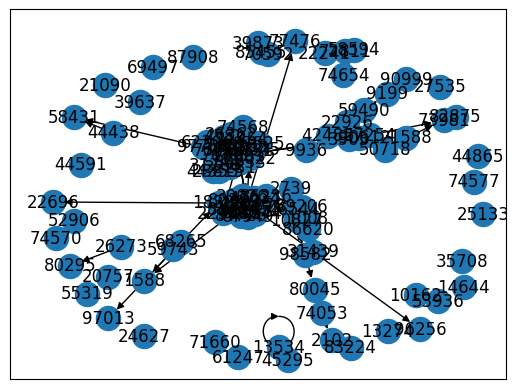

In [13]:
G = nx.DiGraph()

# Add nodes -- this is important because not all nodes are in edgelist
G.add_nodes_from(node_list)

# Add edges with attributes from the DataFrame to the graph
for _, row in edge_list.iterrows():
    G.add_edge(row['poster'], row['receiver'], id = row['ID'], thread=row['thread'])

# Generate a quick network visualization
nx.draw_networkx(G)

In [14]:
print(G.number_of_nodes())
print(G.number_of_edges())

103
98


In [15]:
list(nx.selfloop_edges(G))

[(13534, 13534)]

This is odd, because `edge_list` has 108 rows. 

Let's check attributes of the edge from `8639` to `12345`:

In [16]:
G.get_edge_data(8639, 12345)

{'id': 131, 'thread': 30}

It's always a good idea to check the original dataset for any "bugs".

So let's check whether edges between these two nodes. 

In [17]:
edge_list[(edge_list['poster'] == 8639) & (edge_list['receiver'] == 12345)]

,ID,poster,thread,toID,receiver
71,129,8639,30,128,12345
73,131,8639,30,130,12345


Interesting!! 

Only the edge with ID of 153 is reflected in the NetworkX graph object.

This warrants additional investigation.

Aha! -- On the [DiGraph reference page](https://networkx.org/documentation/stable/reference/classes/digraph.html), there is one important sentence:

> DiGraphs hold directed edges. Self loops are allowed but multiple (parallel) edges are not.

It seems DiGraph only allows one edge between any pair of nodes, so some data were thrown away when multiple edges are observed between two nodes. 

We need to find a solution to deal with this issue.

## Weighted directed network

There could be multiple solutions, depending on your goal. 

One possible solution is to create a [`MultiDiGraph`](https://networkx.org/documentation/stable/reference/classes/multidigraph.html) -- A directed graph that can store multiedges. However, it's probably unnecessary since we are only dealing with one type of edges. 

Another possible solution is to merge multiple edges into one weighted edge. 

This preserves the number of occurrences but throws away the original edge attributes such as ID and thread. 

Whether this is a good solution, again, depends on your goal. 

### Created a new edge list data frame with a `weight` column

In [18]:
el_weighted = edge_list.groupby(['poster', 'receiver']).size().reset_index(name='weight')
el_weighted.sort_values(by=['weight', 'poster'], ascending=[False, True]) # Inspect the weighted edge list, sorted by weight and poster

,poster,receiver,weight
9,8639,12345,2
10,9061,3903,2
20,12345,24601,2
22,12345,47634,2
30,21588,50718,2
...,...,...,...
93,87525,21731,1
94,89206,86620,1
95,97784,73263,1
96,98582,10827,1


## Created a weighted directed network

Now, with the weighted edge list, we can follow the same process and generate a new network. 

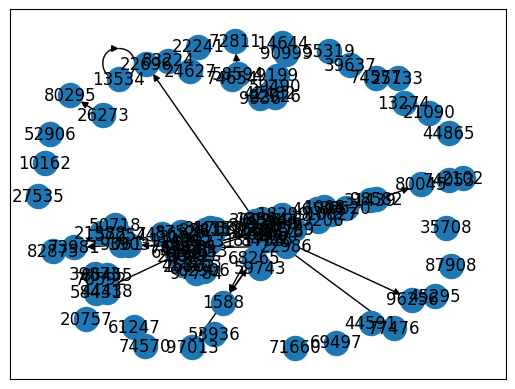

In [19]:
WG = nx.DiGraph()

# Add nodes
WG.add_nodes_from(node_list)

# Add edges with attributes from the DataFrame to the graph
for _, row in el_weighted.iterrows():
    WG.add_edge(row['poster'], row['receiver'], weight = row['weight'])

# Generate a quick network visualization
nx.draw_networkx(WG)

In [20]:
print(WG.number_of_nodes())
print(WG.number_of_edges())

103
98


In [21]:
list(nx.selfloop_edges(WG, data=True))

[(13534, 13534, {'weight': 1})]

In [22]:
WG.remove_edges_from(nx.selfloop_edges(WG))

Let's check the edge from `8639` to `12345` just to be safe:

In [23]:
WG.get_edge_data(8639, 12345)

{'weight': 2}

By this point, you have created a directed, weighted network about student interactions in the MOOC discussion forum. 

## Example 3: Importing Twitter Conversations at #LAK11

This public dataset contains tweets from the first LAK conference. 

The dataset is stored on Google Sheet, with each row representing a tweet. The columns represent various metadata about a tweet provided by the Twitter API. 

In [24]:
tweets = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSHfM5O09_Pw4Rg0nOyvbk-CE1rWHBDFtEygIyretbvhnrewQDiqpQ2XI5g2vcU_fDtPYRJkhUzet3v/pub?gid=56&single=true&output=csv')

In [25]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   from_user          1362 non-null   object 
 1   text               1362 non-null   object 
 2   created_at         1362 non-null   object 
 3   from_user_id       1362 non-null   int64  
 4   geo_coordinates    3 non-null      object 
 5   iso_language_code  1359 non-null   object 
 6   to_user_id         219 non-null    float64
 7   id                 1362 non-null   float64
 8   to_user_id_str     219 non-null    float64
 9   source             1362 non-null   object 
 10  from_user_id_str   1362 non-null   int64  
 11  id_str             1362 non-null   float64
 12  profile_image_url  1362 non-null   object 
 13  status_url         1362 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 149.1+ KB


The data imported from Google Sheet is almost in an edge list format. 

Now we just need to remove those rows that are not replies. This can be done by removing rows with empty values in `to_user_id`.

In [26]:
replies = tweets[~tweets['to_user_id'].isnull()]
replies

,from_user,text,created_at,from_user_id,geo_coordinates,iso_language_code,to_user_id,id,to_user_id_str,source,from_user_id_str,id_str,profile_image_url,status_url
36,Anna_De_Liddo,"@houshuang Hi Stian! we are still in Banf, but...","Thu, 03 Mar 2011 05:31:57 +0000",9526430,NaN,en,172290.0,4.318180e+16,172290.0,&lt;a href=&quot;http://www.tweetdeck.com&quot...,9526430,4.318180e+16,http://a3.twimg.com/profile_images/20659452/IM...,http://twitter.com/Anna_De_Liddo/statuses/4318...
48,psychemedia,@andymcg what edu related activity data projec...,"Wed, 02 Mar 2011 21:03:37 +0000",69223,NaN,en,2316588.0,4.305387e+16,2316588.0,&lt;a href=&quot;http://www.tweetdeck.com&quot...,69223,4.305387e+16,http://a1.twimg.com/profile_images/1195013164/...,http://twitter.com/psychemedia/statuses/430538...
67,NicolaAvery,"@Anna_De_Liddo thank you, no idea how difficul...","Wed, 02 Mar 2011 17:11:29 +0000",13181495,NaN,en,9526430.0,4.299545e+16,9526430.0,&lt;a href=&quot;http://twitter.com/&quot;&gt;...,13181495,4.299545e+16,http://a3.twimg.com/profile_images/797991041/n...,http://twitter.com/NicolaAvery/statuses/429954...
70,Anna_De_Liddo,@NicolaAvery and btw this is a nice idea/featu...,"Wed, 02 Mar 2011 16:51:48 +0000",9526430,NaN,en,13181495.0,4.299050e+16,13181495.0,&lt;a href=&quot;http://www.tweetdeck.com&quot...,9526430,4.299050e+16,http://a3.twimg.com/profile_images/20659452/IM...,http://twitter.com/Anna_De_Liddo/statuses/4299...
71,Anna_De_Liddo,"@NicolaAvery you can see, edit/manage your tag...","Wed, 02 Mar 2011 16:50:53 +0000",9526430,NaN,en,13181495.0,4.299027e+16,13181495.0,&lt;a href=&quot;http://www.tweetdeck.com&quot...,9526430,4.299027e+16,http://a3.twimg.com/profile_images/20659452/IM...,http://twitter.com/Anna_De_Liddo/statuses/4299...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,houshuang,@sbskmi @psychemedia Looking forward to seeing...,"Sat, 26 Feb 2011 01:55:04 +0000",172290,NaN,en,19130020.0,4.131530e+16,19130020.0,&lt;a href=&quot;http://www.tweetdeck.com&quot...,172290,4.131530e+16,http://a3.twimg.com/profile_images/52634283/51...,http://twitter.com/houshuang/statuses/41315277...
1328,houshuang,@sebpaquet in banff for #LAK11 back wednesday...,"Sat, 26 Feb 2011 01:50:49 +0000",172290,NaN,en,386316.0,4.131421e+16,386316.0,&lt;a href=&quot;http://www.tweetdeck.com&quot...,172290,4.131421e+16,http://a3.twimg.com/profile_images/52634283/51...,http://twitter.com/houshuang/statuses/41314208...
1338,houshuang,"@dougclow I'm here now, it's actually not that...","Fri, 25 Feb 2011 21:47:36 +0000",172290,NaN,en,308967.0,4.125300e+16,308967.0,&lt;a href=&quot;http://www.nambu.com/&quot; r...,172290,4.125300e+16,http://a3.twimg.com/profile_images/52634283/51...,http://twitter.com/houshuang/statuses/41253000...
1358,gsiemens,"@JonElmSherrill :). Aparrently, it's supposed ...","Thu, 24 Feb 2011 20:30:42 +0000",5748,NaN,en,237016721.0,4.087126e+16,237016721.0,&lt;a href=&quot;http://www.tweetdeck.com&quot...,5748,4.087126e+16,http://a3.twimg.com/profile_images/1238005253/...,http://twitter.com/gsiemens/statuses/408712594...


With the edge list created, we can use `from_pandas_edgelist` to create a directed graph. 

Note here we do not need a separate node list because all nodes are included in the edge list. In other cases, there are nodes not present in the edge and you will need to create a separate node list (like the first example). 

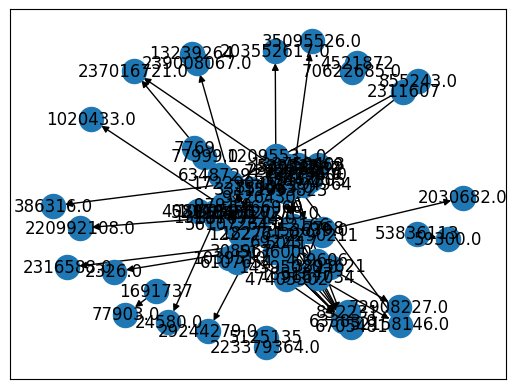

In [27]:
replyG = nx.from_pandas_edgelist(
    replies,
    source = "from_user_id",
    target="to_user_id",
    edge_attr=["created_at", "text"],
    create_using=nx.DiGraph(),
)

nx.draw_networkx(replyG)